In [49]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.regression.linear_model import OLS

# __Simple regression__

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
df = df[['total_bill','tip']]

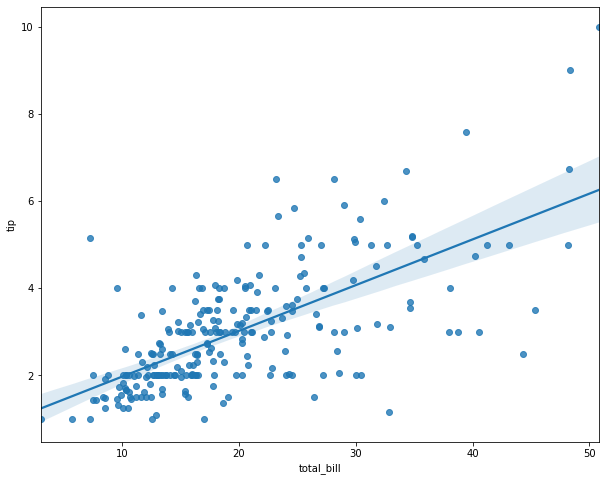

In [14]:
plt.figure(figsize=(10,8))
sns.regplot(x='total_bill', y='tip', data=df)

## __OLS__

We start to apply simple linear regression to the dataset:
- Y : Tips
- x : Total Bill

In [22]:
sm_lm = OLS(df['tip'], sm.add_constant(df[['total_bill']]))
result = sm_lm_std.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           6.69e-34
Time:                        11:15:25   Log-Likelihood:                -271.81
No. Observations:                 244   AIC:                             547.6
Df Residuals:                     242   BIC:                             554.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.81e-16      0.047   5.93e-15      1.0

In [12]:
scaler = StandardScaler()
std_df = df.copy()
scaler.fit(std_df)
std_df = scaler.transform(std_df)
std_df = pd.DataFrame(std_df, columns=df.columns)
std_df

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [20]:
sm_lm_std = OLS(std_df['tip'], sm.add_constant(std_df[['total_bill']]))
result_std = sm_lm_std.fit()
print(result_std.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           6.69e-34
Time:                        11:14:24   Log-Likelihood:                -271.81
No. Observations:                 244   AIC:                             547.6
Df Residuals:                     242   BIC:                             554.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.81e-16      0.047   5.93e-15      1.0


## __Interpretation__

F-Test:
<br>
B1 : P-Value of the Simultant test (Prob (F-statistics)) is below 0.05. We have enough evidence that totall bill affect tip that given to the food servers.
<br>
Partial Test:
1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill has value of zero. in this case, it doesn't make sense that if there is people who paid food freely. So, the interpretation is the model still need B0. 
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that higher total bill increase tip that given to the food servers

Parameter Estimate:
1. B0 = 0.9203 : This is not need to be interpreted because there is no people that paid free (x = 0) and 0 also fall outside 3.07 Dollar - 50.81 Dollar interval
1. B1 = 0.1050 : When the total bill increase 1 Dollar, the tip will increase about 0.1050 Dollar or When the total bill increase 10 Dollar, the tip will increase about 1.05 Dollar (*This interpretation only recommended when total bill fall between 3.07 Dollar and 50.81 Dollar) 
1. It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:
<br>
R-Square = 45.7% : This model can explain 45.7% variation of tips.

In [15]:
df.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [17]:
std_df.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [21]:
std_df.describe()

,total_bill,tip
count,2.440000e+02,2.440000e+02
mean,-6.597637e-17,2.846297e-16
std,1.002056e+00,1.002056e+00
min,-1.881547e+00,-1.447189e+00
25%,-7.247111e-01,-7.229713e-01
50%,-2.241005e-01,-7.117518e-02
75%,4.886857e-01,4.086192e-01
max,3.492068e+00,5.070772e+00


In [18]:
std_df[(std_df['total_bill']>2) |(std_df['total_bill']<-2) ]

,total_bill,tip
23,2.210010,3.318164
56,2.051300,0.001247
59,3.206166,2.702579
95,2.294430,1.254144
102,2.759302,-0.360862
112,2.058054,0.725464
142,2.409241,1.449682
156,3.194910,1.449682
170,3.492068,5.070772
182,2.877490,0.363356


In [19]:
std_df[(std_df['tip']>2) |(std_df['tip']<-2) ]

,total_bill,tip
23,2.210010,3.318164
47,1.419838,2.173900
59,3.206166,2.702579
88,0.554252,2.065268
141,1.633702,2.680853
170,3.492068,5.070772
183,0.380910,2.536009
212,3.212919,4.346554
214,0.943710,2.536009
239,1.040511,2.115963


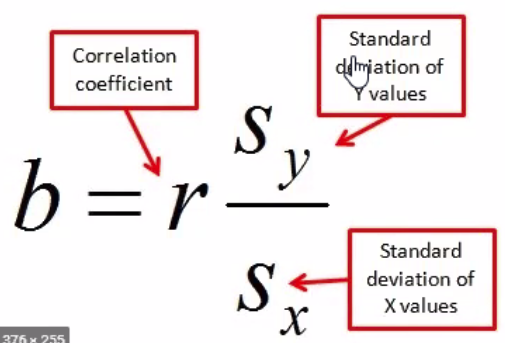

In [58]:
r_pearson = std_df.corr()['tip'][0]
std_bill = std_df.describe()['total_bill'][2]
std_tip = std_df.describe()['tip'][2]

r_pearson*(std_tip/std_bill)

0.6757341092113647

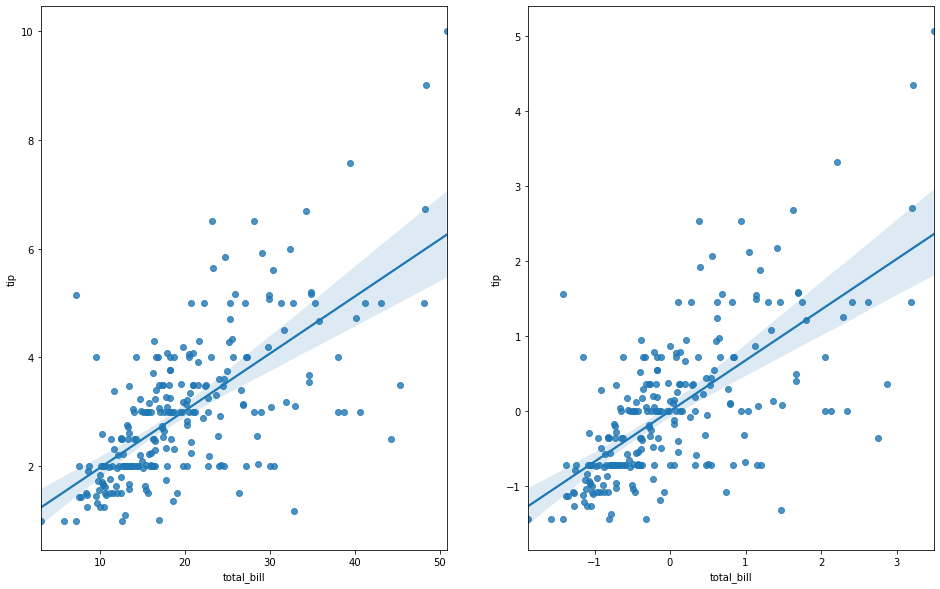

In [56]:
plt.figure(figsize=(16,10))
plt.subplot(121)
sns.regplot(x='total_bill', y='tip', data=df)

plt.subplot(122)
sns.regplot(x='total_bill', y='tip', data=std_df)

plt.show()

## __Linear Model__

In [28]:
X = df[['total_bill']]
y = df['tip']
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [38]:
b1 = lr.coef_

In [37]:
b0 = lr.intercept_

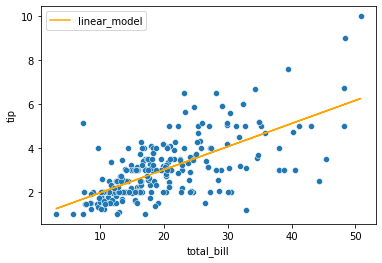

In [42]:
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.plot(df['total_bill'], [b0+(b1*i) for i in df['total_bill']], color='orange', label='linear_model')
plt.legend()

In [44]:
y_pred = lr.predict(X)
df['prediction'] = y_pred
df

,total_bill,tip,prediction
0,16.99,1.01,2.704636
1,10.34,1.66,2.006223
2,21.01,3.50,3.126835
3,23.68,3.31,3.407250
4,24.59,3.61,3.502822
...,...,...,...
239,29.03,5.92,3.969131
240,27.18,2.00,3.774836
241,22.67,2.00,3.301175
242,17.82,1.75,2.791807


In [45]:
mse = mean_squared_error(df['tip'], df['prediction'])
mse

1.036019442011377

In [50]:
rmse = np.sqrt(mse)
rmse

1.0178504025697377

In [46]:
r2 = r2_score(df['tip'], df['prediction'])
r2

0.45661658635167657

In [51]:
df['xi-mean'] = df['total_bill'] - np.mean(df['total_bill'])

df['(xi-mean)squared'] = df['xi-mean']**2

df

,total_bill,tip,prediction,xi-mean,(xi-mean)squared
0,16.99,1.01,2.704636,-2.795943,7.817295
1,10.34,1.66,2.006223,-9.445943,89.225832
2,21.01,3.50,3.126835,1.224057,1.498316
3,23.68,3.31,3.407250,3.894057,15.163683
4,24.59,3.61,3.502822,4.804057,23.078967
...,...,...,...,...,...
239,29.03,5.92,3.969131,9.244057,85.452597
240,27.18,2.00,3.774836,7.394057,54.672084
241,22.67,2.00,3.301175,2.884057,8.317787
242,17.82,1.75,2.791807,-1.965943,3.864930


In [52]:
# nyari standard error koefisiennya

std_b1 = rmse / np.sqrt(np.sum(df['(xi-mean)squared']))
std_b1 

0.007334544177444975

In [54]:
t_stats = b1 / std_b1
t_stats

array([14.31916079])

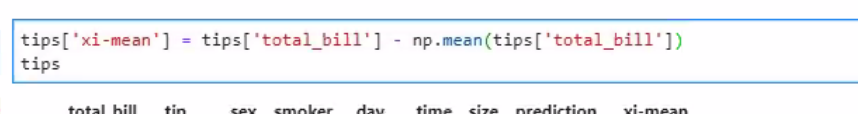


# __Multiple regression__

In [59]:
tips = sns.load_dataset('tips')

Text(0.5, 0, 'tip')

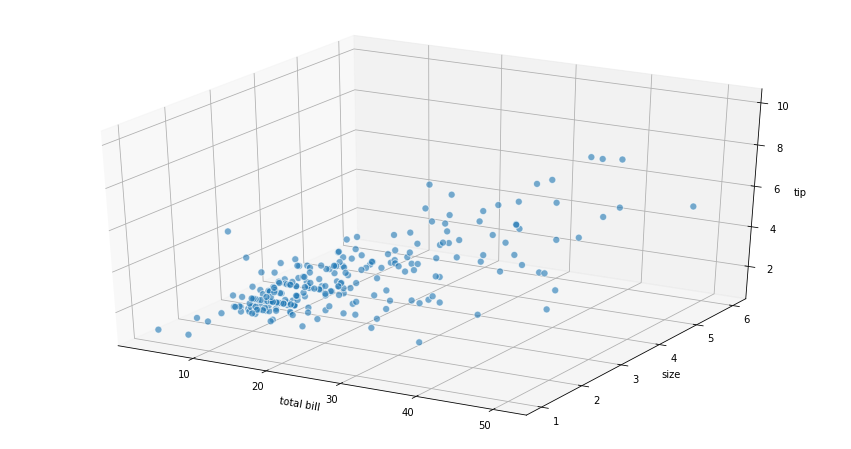

In [61]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection = '3d')
xv = tips['total_bill']
yv = tips['size']
zv = tips['tip']
ax.scatter(xv, yv, zv, s=50, alpha=0.6, edgecolors='w')
ax.set_xlabel('total bill')
ax.set_ylabel('size')
ax.set_zlabel('tip')

In [ ]:
pal = dict(df1="red", df2="blue")
g = sns.FacetGrid(df, hue='df', palette=pal, size=5);
g.map(plt.scatter, "x", "y", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.map(sns.regplot, "x", "y", ci=None, robust=1)
g.add_legend();

<Figure size 720x576 with 0 Axes>

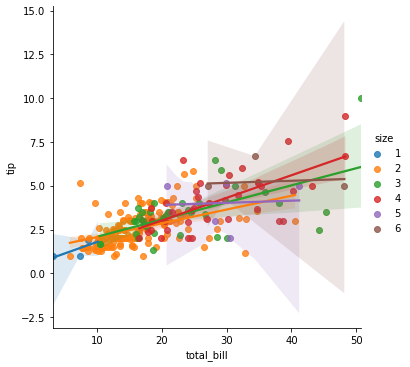

In [68]:
plt.figure(figsize=(10,8))
g = sns.lmplot(
    data=tips,
    x="total_bill", y="tip",hue="size",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("total_bill", "tip")

In [70]:
X2 = tips[['total_bill','size']]
y2 = tips['tip']
lr = LinearRegression()
lr.fit(X2,y2)

LinearRegression()

In [71]:
lr.coef_

array([0.09271334, 0.19259779])

In [73]:
lr.intercept_

0.6689447408125027

In [72]:
b1 = lr.coef_[0]
b2 = lr.coef_[1]
b0 = lr.intercept_

In [74]:
y_pred2 = lr.predict(X2)
tips['prediction'] = y_pred2
tips

,total_bill,tip,sex,smoker,day,time,size,prediction
0,16.99,1.01,Female,No,Sun,Dinner,2,2.629340
1,10.34,1.66,Male,No,Sun,Dinner,3,2.205394
2,21.01,3.50,Male,No,Sun,Dinner,3,3.194645
3,23.68,3.31,Male,No,Sun,Dinner,2,3.249592
4,24.59,3.61,Female,No,Sun,Dinner,4,3.719157
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.938206
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.574089
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.155952
242,17.82,1.75,Male,No,Sat,Dinner,2,2.706292


In [75]:
mse = mean_squared_error(tips['tip'], tips['prediction'])
mse

1.014564905610028

In [77]:
rmse = np.sqrt(mse)
rmse

1.007256127114662

In [78]:
r2 = r2_score(tips['tip'], tips['prediction'])
r2

0.46786930879612587

In [ ]:
# tips['xi-mean'] = tips['total_bill'] - np.mean(tips['total_bill'])

# tips['(xi-mean)squared'] = df['xi-mean']**2

# tips

In [79]:
sm_lm_b2 = OLS(tips['tip'], sm.add_constant(tips[['size']]))
result_std = sm_lm_b2.fit()
print(result_std.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     76.18
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           4.30e-16
Time:                        15:34:37   Log-Likelihood:                -391.56
No. Observations:                 244   AIC:                             787.1
Df Residuals:                     242   BIC:                             794.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1691      0.223      5.233      0.0

In [81]:
sm_lm_b1 = OLS(tips['tip'], sm.add_constant(tips[['total_bill']]))
result_std = sm_lm_b1.fit()
print(result_std.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           6.69e-34
Time:                        15:35:00   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

In [82]:
sm_lm_combined = OLS(tips['tip'], sm.add_constant(tips[['total_bill','size']]))
result_std = sm_lm_combined.fit()
print(result_std.summary())

# prob : pvalue nya, secara total, klo kecil banget gitu brrti mereka berdua emang ngaruh ke tip

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           9.67e-34
Time:                        15:37:24   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

In [83]:
tips.corr()

,total_bill,tip,size,prediction
total_bill,1.000000,0.675734,0.598315,0.987901
tip,0.675734,1.000000,0.489299,0.684010
size,0.598315,0.489299,1.000000,0.715339
prediction,0.987901,0.684010,0.715339,1.000000


In [86]:
tips['xi-mean_totalbill'] = tips['total_bill'] - np.mean(tips['total_bill'])
tips['xi-mean_size'] = tips['size'] - np.mean(tips['size'])
tips

,total_bill,tip,sex,smoker,day,time,size,prediction,xi-mean_totalbill,xi-mean_size
0,16.99,1.01,Female,No,Sun,Dinner,2,2.629340,-2.795943,-0.569672
1,10.34,1.66,Male,No,Sun,Dinner,3,2.205394,-9.445943,0.430328
2,21.01,3.50,Male,No,Sun,Dinner,3,3.194645,1.224057,0.430328
3,23.68,3.31,Male,No,Sun,Dinner,2,3.249592,3.894057,-0.569672
4,24.59,3.61,Female,No,Sun,Dinner,4,3.719157,4.804057,1.430328
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.938206,9.244057,0.430328
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.574089,7.394057,-0.569672
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.155952,2.884057,-0.569672
242,17.82,1.75,Male,No,Sat,Dinner,2,2.706292,-1.965943,-0.569672


In [88]:
tips['(xi-mean)_size_squared'] = tips['xi-mean_size']**2
tips['(xi-mean)_totalbill_squared'] = tips['xi-mean_totalbill']**2
tips

,total_bill,tip,sex,smoker,day,time,size,prediction,xi-mean_totalbill,xi-mean_size,(xi-mean)_size_squared,(xi-mean)_totalbill_squared
0,16.99,1.01,Female,No,Sun,Dinner,2,2.629340,-2.795943,-0.569672,0.324526,7.817295
1,10.34,1.66,Male,No,Sun,Dinner,3,2.205394,-9.445943,0.430328,0.185182,89.225832
2,21.01,3.50,Male,No,Sun,Dinner,3,3.194645,1.224057,0.430328,0.185182,1.498316
3,23.68,3.31,Male,No,Sun,Dinner,2,3.249592,3.894057,-0.569672,0.324526,15.163683
4,24.59,3.61,Female,No,Sun,Dinner,4,3.719157,4.804057,1.430328,2.045838,23.078967
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.938206,9.244057,0.430328,0.185182,85.452597
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.574089,7.394057,-0.569672,0.324526,54.672084
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.155952,2.884057,-0.569672,0.324526,8.317787
242,17.82,1.75,Male,No,Sat,Dinner,2,2.706292,-1.965943,-0.569672,0.324526,3.864930


In [89]:
std_b1 = rmse / np.sqrt(np.sum(tips['(xi-mean)_totalbill_squared']))
std_b1

0.007258202721807589

In [90]:
std_b2 = rmse / np.sqrt(np.sum(tips['(xi-mean)_size_squared']))
std_b2

0.06793767631945401

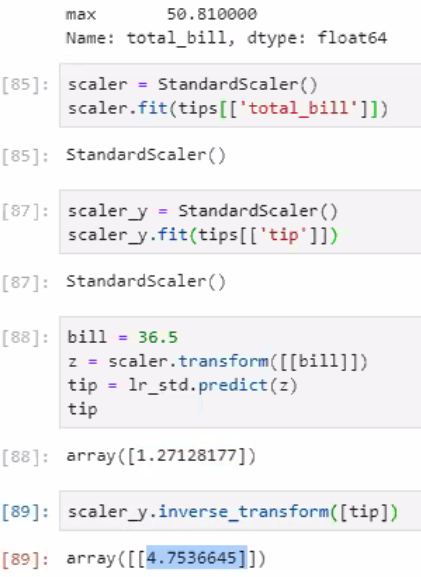

best practice, y jangan di scaler
yang X aja

td cuman mau ngeliatin inverse_transform() doang euy

Best practice untuk scaling: Yang discaling hanya X_i nya saja. Y nya biarin.

StandardScaling = mean = 0; std = 1 <br>
MinMaxScaler = min 0; max = 1 <br>
RobustScaler = Robust terhadap outliers (untuk meminimalisir efek outliers) <br>
MaxAbsScaler

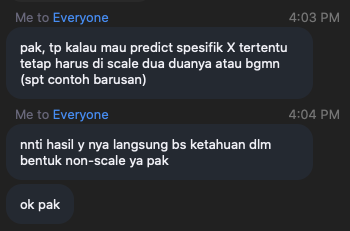